<a href="https://colab.research.google.com/github/AjinJayan/AJ/blob/master/RANDOM%20FOREST%20Analytics%20vidya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
data=pd.read_csv('train.csv')

In [2]:
data.isnull().sum()

ID                                0
Office_PIN                        0
Applicant_City_PIN                0
Applicant_Gender                 53
Applicant_Marital_Status         59
Applicant_Occupation           1090
Applicant_Qualification          71
Manager_Joining_Designation       0
Manager_Current_Designation       0
Manager_Grade                     0
Manager_Status                    0
Manager_Gender                    0
Manager_Num_Application           0
Manager_Num_Coded                 0
Manager_Business                  0
Manager_Num_Products              0
Manager_Business2                 0
Manager_Num_Products2             0
Business_Sourced                  0
dtype: int64

In [3]:
data.dtypes

ID                              object
Office_PIN                       int64
Applicant_City_PIN               int64
Applicant_Gender                object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced                 int64
dtype: object

In [4]:
data.head()

,ID,Office_PIN,Applicant_City_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,844120,M,M,Others,Graduate,Level 1,Level 2,3.0,Confirmation,M,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,844111,M,S,Others,Class XII,Level 1,Level 2,3.0,Confirmation,M,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,844101,M,M,Business,Class XII,Level 1,Level 1,2.0,Confirmation,M,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,814112,M,S,Salaried,Class XII,Level 1,Level 3,4.0,Confirmation,F,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,815351,M,M,Others,Class XII,Level 1,Level 1,2.0,Confirmation,M,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [0]:
data['Applicant_Gender'].fillna(data['Applicant_Gender'].mode()[0],inplace=True)

In [0]:
data['Applicant_Marital_Status'].fillna(data['Applicant_Marital_Status'].mode()[0],inplace=True)

In [0]:
data['Applicant_Occupation'].fillna(data['Applicant_Occupation'].mode()[0],inplace=True)

In [0]:
data['Applicant_Qualification'].fillna(data['Applicant_Qualification'].mode()[0],inplace=True)

In [9]:
data.isnull().sum()

ID                             0
Office_PIN                     0
Applicant_City_PIN             0
Applicant_Gender               0
Applicant_Marital_Status       0
Applicant_Occupation           0
Applicant_Qualification        0
Manager_Joining_Designation    0
Manager_Current_Designation    0
Manager_Grade                  0
Manager_Status                 0
Manager_Gender                 0
Manager_Num_Application        0
Manager_Num_Coded              0
Manager_Business               0
Manager_Num_Products           0
Manager_Business2              0
Manager_Num_Products2          0
Business_Sourced               0
dtype: int64

In [10]:
data.describe(include='all')

,ID,Office_PIN,Applicant_City_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
count,8844,8844.000000,8844.000000,8844,8844,8844,8844,8844,8844,8844.000000,8844,8844,8844.000000,8844.000000,8.844000e+03,8844.000000,8.844000e+03,8844.000000,8844.000000
unique,8844,NaN,NaN,2,4,5,10,8,5,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,FIN1006918,NaN,NaN,M,M,Salaried,Class XII,Level 1,Level 2,NaN,Confirmation,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,6709,5792,4636,5497,4632,3208,NaN,5277,7627,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,450714.378562,452638.591022,NaN,NaN,NaN,NaN,NaN,NaN,3.264134,NaN,NaN,1.939733,0.758933,1.843710e+05,7.152307,1.829263e+05,7.131275,0.342718
std,NaN,234079.460837,238045.727919,NaN,NaN,NaN,NaN,NaN,NaN,1.137449,NaN,NaN,2.150529,1.188644,2.747163e+05,8.439351,2.718021e+05,8.423597,0.474645
min,NaN,110005.000000,110001.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,0.000000,-2.652890e+05,0.000000,-2.652890e+05,0.000000,0.000000
25%,NaN,226001.000000,226002.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
50%,NaN,416001.000000,422001.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,1.000000,0.000000,1.021780e+05,5.000000,1.017140e+05,5.000000,0.000000
75%,NaN,695014.000000,695009.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,3.000000,1.000000,2.471165e+05,11.000000,2.464612e+05,11.000000,1.000000


In [11]:
data.dtypes

ID                              object
Office_PIN                       int64
Applicant_City_PIN               int64
Applicant_Gender                object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced                 int64
dtype: object

In [0]:
temp=['Applicant_Gender','Applicant_Marital_Status','Applicant_Occupation','Applicant_Qualification','Manager_Joining_Designation','Manager_Current_Designation','Manager_Status','Manager_Gender']

In [13]:
for i in temp:
  print(data[i].value_counts())
  print('***********',i,'&&&&&&&&&&&&&')
  print(' ')


M    6709
F    2135
Name: Applicant_Gender, dtype: int64
*********** Applicant_Gender &&&&&&&&&&&&&
 
M    5792
S    3042
W       6
D       4
Name: Applicant_Marital_Status, dtype: int64
*********** Applicant_Marital_Status &&&&&&&&&&&&&
 
Salaried         4636
Business         2157
Others           1809
Self Employed     146
Student            96
Name: Applicant_Occupation, dtype: int64
*********** Applicant_Occupation &&&&&&&&&&&&&
 
Class XII                                                           5497
Graduate                                                            2958
Class X                                                              195
Others                                                               116
Masters of Business Administration                                    71
Associate / Fellow of Institute of Chartered Accountans of India       3
Professional Qualification in Marketing                                1
Associate/Fellow of Acturial Society of India    

In [0]:
data=pd.get_dummies(data.drop(['ID'],axis=1))

DATA CLEANED


In [0]:
x=data.drop(['Business_Sourced'],axis=1)
y=data['Business_Sourced']

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)


In [65]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
pred=clf.predict(x_test)

In [0]:
from sklearn.metrics import roc_auc_score

In [0]:
score=roc_auc_score(pred,y_test)

In [68]:
score

0.5750316578369298

In [0]:
pred_train=clf.predict(x_train)

In [0]:
score_train=roc_auc_score(pred_train,y_train)

In [25]:
score_train

0.9926756714031215

In [0]:
score=[]
for i in range(20,24):
  clf=RandomForestClassifier(max_depth=i)
  clf.fit(x_train,y_train)
  pred=clf.predict(x_test)
  score1=roc_auc_score(y_test,pred)
  score.append(score1)


In [0]:
frame=pd.DataFrame({'depth':range(20,24),'score':score})

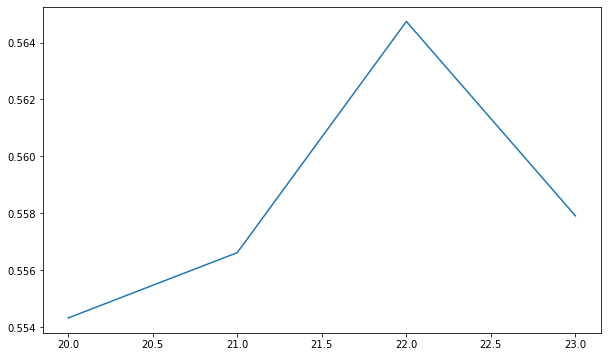

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(frame['depth'],frame['score'])

In [71]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
pred=clf.predict(x_test)
score1=roc_auc_score(y_test,pred)
  

In [73]:
score1

0.5504565206732681

In [74]:
clf.feature_importances_

array([1.32171633e-01, 2.02826843e-01, 2.33145558e-02, 7.31955330e-02,
       3.89810296e-02, 7.66810578e-02, 5.31455202e-02, 7.65357880e-02,
       5.19656889e-02, 1.36203466e-02, 1.37971394e-02, 3.65231705e-04,
       1.99043880e-02, 1.87495361e-02, 3.57985606e-04, 1.88290571e-02,
       1.84493426e-02, 2.17773064e-02, 5.13836944e-03, 4.01406945e-03,
       1.90624511e-04, 1.36422086e-05, 9.21511167e-05, 1.37956097e-04,
       4.16712126e-03, 1.62282132e-02, 1.56066984e-02, 2.23703823e-03,
       4.24095916e-03, 6.78375935e-05, 9.96420990e-03, 9.90535062e-03,
       5.70661691e-03, 2.93383287e-03, 2.84558343e-05, 7.22099832e-04,
       8.23553397e-05, 9.57401860e-04, 7.17039402e-03, 9.11963764e-03,
       8.63564484e-03, 6.93465267e-03, 1.45036375e-03, 5.19341125e-03,
       4.96942635e-03, 9.61007494e-03, 9.81340789e-03])

In [0]:
car=pd.DataFrame({'features':x.columns,'Impo':clf.feature_importances_})


In [77]:
car

,features,Impo
0,Office_PIN,0.132172
1,Applicant_City_PIN,0.202827
2,Manager_Grade,0.023315
3,Manager_Num_Application,0.073196
4,Manager_Num_Coded,0.038981
5,Manager_Business,0.076681
6,Manager_Num_Products,0.053146
7,Manager_Business2,0.076536
8,Manager_Num_Products2,0.051966
9,Applicant_Gender_F,0.013620


In [78]:
pd.Series(clf.feature_importances_,index=x.columns)

Office_PIN                                                                                  0.132172
Applicant_City_PIN                                                                          0.202827
Manager_Grade                                                                               0.023315
Manager_Num_Application                                                                     0.073196
Manager_Num_Coded                                                                           0.038981
Manager_Business                                                                            0.076681
Manager_Num_Products                                                                        0.053146
Manager_Business2                                                                           0.076536
Manager_Num_Products2                                                                       0.051966
Applicant_Gender_F                                                                         